In [1]:
using StaticArrays
# using Plots
using LinearAlgebra
# using Makie
using GLMakie 
using LsqFit
include("Elastic.jl")
using .Elastic
using FFMPEG
using DelimitedFiles
using Distributions
using Statistics
using Plots
using Test
using BenchmarkTools



atom_positions = [
    Vector([0.0, 0.0, 0.0]),
    Vector([0.0, 0.5, 0.5]),
    Vector([0.5, 0.0, 0.5]),
    Vector([0.5, 0.5, 0.0]),
    Vector([1.0, 0.0, 0.0]),
    Vector([0.0, 1.0, 0.0]),
    Vector([0.0, 0.0, 1.0]),
    Vector([0.5, 1.0, 0.5]),
    Vector([1.0, 0.5, 0.5]),
    Vector([0.5, 0.5, 1.0]),
    Vector([1.0, 0.0, 1.0]),
    Vector([1.0, 1.0, 0.0]),
    Vector([0.0, 1.0, 1.0]),
    Vector([1.0, 1.0, 1.0])
] 


lattice_constant = 3.61
# 定义铜的FCC晶胞的基矢量
lattice_vectors = collect((Matrix([
    lattice_constant 0.0 0.0; #a1
    0.0 lattice_constant 0.0; #a2
    0.0 0.0 lattice_constant] #a3
))')

# 创建铜的原子列表
atoms = [Atom(pos) for pos in atom_positions]


cell=UnitCell(lattice_vectors,atoms)
cpcell=copycell(cell,3,3,3)
fcell=filtercell(cpcell)

UnitCell([3.61 0.0 0.0; 0.0 3.61 0.0; 0.0 0.0 3.61], Atom[Atom([-3.0, -3.0, -3.0], [0.0, 0.0, 0.0], 1.0, 8, [1, 1, 1]), Atom([-3.0, -3.0, -2.0], [0.0, 0.0, 0.0], 1.0, 4, [1, 1, 0]), Atom([-3.0, -3.0, -1.0], [0.0, 0.0, 0.0], 1.0, 4, [1, 1, 0]), Atom([-3.0, -3.0, 0.0], [0.0, 0.0, 0.0], 1.0, 4, [1, 1, 0]), Atom([-3.0, -3.0, 1.0], [0.0, 0.0, 0.0], 1.0, 4, [1, 1, 0]), Atom([-3.0, -3.0, 2.0], [0.0, 0.0, 0.0], 1.0, 4, [1, 1, 0]), Atom([-3.0, -2.0, -3.0], [0.0, 0.0, 0.0], 1.0, 4, [1, 0, 1]), Atom([-3.0, -2.0, -2.0], [0.0, 0.0, 0.0], 1.0, 2, [1, 0, 0]), Atom([-3.0, -2.0, -1.0], [0.0, 0.0, 0.0], 1.0, 2, [1, 0, 0]), Atom([-3.0, -2.0, 0.0], [0.0, 0.0, 0.0], 1.0, 2, [1, 0, 0])  …  Atom([2.5, 1.5, -1.0], [0.0, 0.0, 0.0], 1.0, 1, [0, 0, 0]), Atom([2.5, 1.5, 0.0], [0.0, 0.0, 0.0], 1.0, 1, [0, 0, 0]), Atom([2.5, 1.5, 1.0], [0.0, 0.0, 0.0], 1.0, 1, [0, 0, 0]), Atom([2.5, 1.5, 2.0], [0.0, 0.0, 0.0], 1.0, 1, [0, 0, 0]), Atom([2.5, 2.5, -3.0], [0.0, 0.0, 0.0], 1.0, 2, [0, 0, 1]), Atom([2.5, 2.5, -2.0], [0.

[27.0 9.0 3.0 1.0; 27.0 6.0 1.0 0.0; 25.23 5.8 1.0 0.0; 24.389 8.41 2.9 1.0]
[55.22675120157206, -488.4113102970253, 1439.345579339707, -1413.4572277883378]


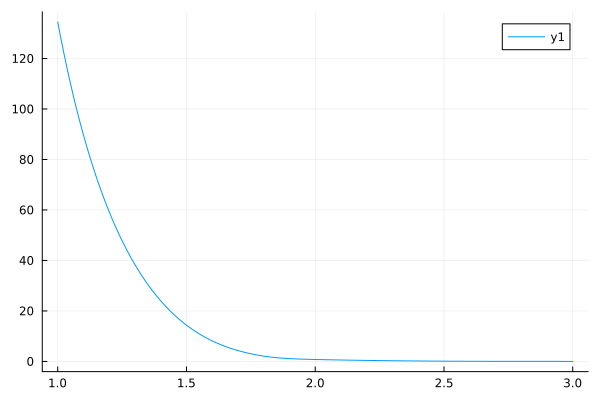

In [16]:
function lj(r::Float64)
    return 4*(1/r^12-1/r^6)
end
function Flj(r::Vector{Float64})
    rn=norm(r)
    return 24*(2/rn^14-1/rn^8)*r
end

ct=3.0
# interaction = Interaction(lj, Flj, ct, 0.1)
interaction=Interaction(EMACu_phi, EMACu_phi_gradient, ct, 0.1,embedding_energy)
xx=1.0:0.001:3.0
y=interaction.cutenergy.(xx)
Plots.plot(xx,y)

In [17]:
cell_forcei(fcell,interaction,1)

UndefVarError: UndefVarError: `intertaction` not defined in `Main.Elastic.Model`
Suggestion: check for spelling errors or missing imports.

In [4]:
fcell

UnitCell([3.61 0.0 0.0; 0.0 3.61 0.0; 0.0 0.0 3.61], Atom[Atom([-3.0, -3.0, -3.0], [0.0, 0.0, 0.0], 1.0, 8, [1, 1, 1]), Atom([-3.0, -3.0, -2.0], [0.0, 0.0, 0.0], 1.0, 4, [1, 1, 0]), Atom([-3.0, -3.0, -1.0], [0.0, 0.0, 0.0], 1.0, 4, [1, 1, 0]), Atom([-3.0, -3.0, 0.0], [0.0, 0.0, 0.0], 1.0, 4, [1, 1, 0]), Atom([-3.0, -3.0, 1.0], [0.0, 0.0, 0.0], 1.0, 4, [1, 1, 0]), Atom([-3.0, -3.0, 2.0], [0.0, 0.0, 0.0], 1.0, 4, [1, 1, 0]), Atom([-3.0, -2.0, -3.0], [0.0, 0.0, 0.0], 1.0, 4, [1, 0, 1]), Atom([-3.0, -2.0, -2.0], [0.0, 0.0, 0.0], 1.0, 2, [1, 0, 0]), Atom([-3.0, -2.0, -1.0], [0.0, 0.0, 0.0], 1.0, 2, [1, 0, 0]), Atom([-3.0, -2.0, 0.0], [0.0, 0.0, 0.0], 1.0, 2, [1, 0, 0])  …  Atom([2.5, 1.5, -1.0], [0.0, 0.0, 0.0], 1.0, 1, [0, 0, 0]), Atom([2.5, 1.5, 0.0], [0.0, 0.0, 0.0], 1.0, 1, [0, 0, 0]), Atom([2.5, 1.5, 1.0], [0.0, 0.0, 0.0], 1.0, 1, [0, 0, 0]), Atom([2.5, 1.5, 2.0], [0.0, 0.0, 0.0], 1.0, 1, [0, 0, 0]), Atom([2.5, 2.5, -3.0], [0.0, 0.0, 0.0], 1.0, 2, [0, 0, 1]), Atom([2.5, 2.5, -2.0], [0.

In [5]:
# EMACu_phi(r) 函数
function EMACu_phi(r)
    phi = 0.0
    if r <= 1.8
        phi += exp(11.026565103477 - 10.167211017722 * r + 6.0017702915006 * r^2 - 1.9598299733506 * r^3)
    end
    if 1.8 < r <= 2.8
        phi += 3.3519281301971 * (2.8 - r)^4 - 47.447602323833 * (2.8 - r)^5 + 111.06454537813 * (2.8 - r)^6 - 122.56379390195 * (2.8 - r)^7 + 49.14572206502 * (2.8 - r)^8
    end
    if 1.8 < r <= 4.8
        phi += 4.0605833179061 * (4.8 - r)^4 + 2.5958091214976 * (4.8 - r)^5 + 5.5656604545299 * (4.8 - r)^6 + 1.5184323060743 * (4.8 - r)^7 + 0.39696001635415 * (4.8 - r)^8
    end
    if 1.8 < r <= 6.0
        phi += -0.21402913758299 * (6.0 - r)^4 + 1.1714811538458 * (6.0 - r)^5 - 1.9913969426765 * (6.0 - r)^6 + 1.3862043035438 * (6.0 - r)^7 - 0.34520315264743 * (6.0 - r)^8
    end
    return phi
end

# EMACu_psi(r) 函数
function EMACu_psi(r)
    psi = 0.0
    if 0 <= r <= 2.4
        psi += 0.0199999875362 * (2.4 - r)^4
    end
    if 0 <= r <= 3.2
        psi += 0.019987533420669 * (3.2 - r)^4
    end
    if 0 <= r <= 4.5
        psi += 0.018861676713565 * (4.5 - r)^4
    end
    if 0 <= r <= 6.0
        psi += 0.0066082982694659 * (6.0 - r)^4
    end
    return psi
end

# EMACu_Phi(rho) 函数
function EMACu_Phi(rho)
    Phi = 0.0
    if rho >= 0
        Phi += -rho^0.5
    end
    if rho>=9.0 
        Phi += -5.7112865649408e-5 * (rho - 9)^4
    end
    if 11 <= rho 
        Phi += 3.0303487333648e-4 * (rho - 11)^4
    end
    if 13 <= rho 
        Phi += -5.4720795296134e-4 * (rho - 13)^4
    end
    if 15 <= rho
        Phi += 4.6278681464721e-4 * (rho - 15)^4
    end
    if 16 <= rho
        Phi += -1.0310712451906e-4 * (rho - 16)^4
    end
    if 16.5 <= rho
        Phi += 3.0634000239833e-3 * (rho - 16.5)^4
    end
    if 17 <= rho 
        Phi += -2.8308102136994e-3 * (rho - 17)^4
    end
    if 18 <= rho
        Phi += 6.4044567482688e-4 * (rho - 18)^4
    end
    return Phi
end


EMACu_Phi (generic function with 1 method)

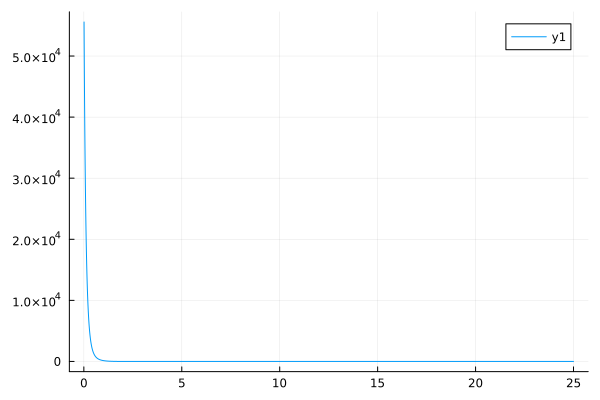

In [6]:
r=0.01:0.001:25
y=EMACu_phi.(r)
y=exp.(11.026565103477 .- 10.167211017722 * r + 6.0017702915006 * r.^2 - 1.9598299733506 * r.^3)
Plots.plot(r,y)

In [7]:
function EMA_rhoi(cell::UnitCell,i,EMA_psi::T=EMACu_psi) where T
    natom=length(cell.atoms)
    ltv=cell.lattice_vectors
    rhoi=0.0
    for j in 1:natom
        if j!=i
        rij=ltv*(cell.atoms[j].position-cell.atoms[i].position)
        nrij=norm(rij)
        rhoi+=EMA_psi(nrij)
        end
    end
    return rhoi
end

function embedding_energy(cell::UnitCell,EMA_psi::T1=EMACu_psi,EMA_Phi::T2=EMACu_Phi) where {T1,T2}
    natom=length(cell.atoms)
    E=0.0
    for i in 1:natom
        rhoi=EMA_rhoi(cell,i,EMA_psi)
        E+=EMA_Phi(rhoi)
    end
    return E
end

# function EMA_rhoi_gradient(cell::UnitCell,i::Int,EMA_psi_gradient::T=EMACu_psi_gradient) where T
#     natom=length(cell.atoms)
#     ltv=cell.lattice_vectors
#     drhoi=zeros(3)
#     for j in 1:natom
#         if j!=i
#         rij=ltv*(cell.atoms[j].position-cell.atoms[i].position)
#         drhoi+=EMA_psi_gradient(rij)
#         end
#     end
#     return drhoi
# end

# function embedding_forcei(cell::UnitCell,i::Int,EMA_psi_gradient::T1=EMACu_psi_gradient,EMA_Phi_gradient::T2=EMACu_Phi_gradient,EMA_rhoi::T3=EMA_rhoi,EMA_psi::T4=EMACu_psi) where {T1,T2,T3,T4}
#     natom=length(cell.atoms)
#     ltv=cell.lattice_vectors
#     F=zeros(3,natom)
#     rij=ltv*(cell.atoms[j].position-cell.atoms[i].position)
#     for k in 1:natom
#         rhok=EMA_rhoi(cell,k,EMA_psi)
#         dphik=EMA_psi_gradient(cell,r)
#     end
# end

embedding_energy (generic function with 3 methods)

In [9]:
embedding_energy(fcell)

-3203.894544467283

In [10]:
function  Ngradiant0(cell::UnitCell,i::Int,f::Function,para::Vector;dr::Vector{Float64}=[0.001,0.001,0.001])
    df=zeros(3)
    lt=cell.lattice_vectors
    invlt=inv(lt)
    drm=Diagonal(dr)
    
    for j in 1:3
        dri=invlt*drm[j,:]
        dcell=deepcopy(cell)
        dcell.atoms[i].position+=dri
        f1=f(dcell,para...)
        dcell.atoms[i].position-=2*dri
        f2=f(dcell,para...)
        df[j]=(f1-f2)/2/dr[j]
    end
    return df
end

Ngradiant0 (generic function with 1 method)

In [11]:
embedding_energy

embedding_energy (generic function with 3 methods)

In [12]:
Ngradiant0(fcell,10,embedding_energy,[])

3-element Vector{Float64}:
 -1.5091571335688059
  0.03012702882188023
 -1.3642420526593924e-9

In [13]:
EMA_rhoi(fcell,1)
embedding_energy(fcell)
EMA_rhoi_gradient(fcell,1,EMACu_psi_gradient)


UndefVarError: UndefVarError: `EMA_rhoi_gradient` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [14]:


# EMACu_phi(r) 的梯度函数
function EMACu_phi_gradient(vec_r::Vector{Float64})
    dphi_dr = 0.0
    r=norm(vec_r)
    if 1 <= r <= 1.8
        exp_term = exp(11.026565103477 - 10.167211017722 * r + 6.0017702915006 * r^2 - 1.9598299733506 * r^3)
        dphi_dr += exp_term * (-10.167211017722 + 2 * 6.0017702915006 * r - 3 * 1.9598299733506 * r^2)
    end
    if 1.8 < r <= 2.8
        dphi_dr += -4 * 3.3519281301971 * (2.8 - r)^3 + 5 * 47.447602323833 * (2.8 - r)^4 - 6 * 111.06454537813 * (2.8 - r)^5 + 7 * 122.56379390195 * (2.8 - r)^6 - 8 * 49.14572206502 * (2.8 - r)^7
    end
    if 1.8 < r <= 4.8
        dphi_dr += -4 * 4.0605833179061 * (4.8 - r)^3 - 5 * 2.5958091214976 * (4.8 - r)^4 - 6 * 5.5656604545299 * (4.8 - r)^5 - 7 * 1.5184323060743 * (4.8 - r)^6 - 8 * 0.39696001635415 * (4.8 - r)^7
    end
    if 1.8 < r <= 6.0
        dphi_dr += 4 * 0.21402913758299 * (6.0 - r)^3 - 5 * 1.1714811538458 * (6.0 - r)^4 + 6 * 1.9913969426765 * (6.0 - r)^5 - 7 * 1.3862043035438 * (6.0 - r)^6 + 8 * 0.34520315264743 * (6.0 - r)^7
    end
    return dphi_dr * vec_r / r
end



# EMACu_psi(r) 的梯度函数
function EMACu_psi_gradient(vec_r::Vector{Float64})
    dpsi_dr = 0.0
    r=norm(vec_r)
    if 0 <= r <= 2.4
        dpsi_dr += -4 * 0.0199999875362 * (2.4 - r)^3
    end
    if 0 <= r <= 3.2
        dpsi_dr += -4 * 0.019987533420669 * (3.2 - r)^3
    end
    if 0 <= r <= 4.5
        dpsi_dr += -4 * 0.018861676713565 * (4.5 - r)^3
    end
    if 0 <= r <= 6.0
        dpsi_dr += -4 * 0.0066082982694659 * (6.0 - r)^3
    end
    return dpsi_dr * vec_r / r
end



# EMACu_Phi(rho) 的梯度函数
function EMACu_Phi_gradient(rho)
    dPhi_drho = 0.0
    if 0 <= rho 
        dPhi_drho += -0.5 * rho^(-0.5)
    end
    if 9 <= rho 
        dPhi_drho += -4 * 5.7112865649408e-5 * (rho - 9)^3
    end
    if 11 <= rho 
        dPhi_drho += 4 * 3.0303487333648e-4 * (rho - 11)^3
    end
    if 13 <= rho 
        dPhi_drho += -4 * 5.4720795296134e-4 * (rho - 13)^3
    end
    if 15 <= rho 
        dPhi_drho += 4 * 4.6278681464721e-4 * (rho - 15)^3
    end
    if 16 <= rho 
        dPhi_drho += -4 * 1.0310712451906e-4 * (rho - 16)^3
    end
    if 16.5 <= rho 
        dPhi_drho += 4 * 3.0634000239833e-3 * (rho - 16.5)^3
    end
    if 17 <= rho
        dPhi_drho += -4 * 2.8308102136994e-3 * (rho - 17)^3
    end
    if 18 <= rho
        dPhi_drho += 4 * 6.4044567482688e-4 * (rho - 18)^3
    end
    return dPhi_drho 
end


EMACu_Phi_gradient (generic function with 1 method)